In [10]:
import pandas as pd
import numpy as np
import glob
import os
import re
from collections import namedtuple
from operator import itemgetter
import matplotlib.pyplot as plt
%matplotlib notebook
plt.rcParams["figure.figsize"] = (12,9)

In [11]:
data_files = '/home/akreimer/prj/monocular_odometry/workspace/output/rf_64300_00/predict/*'
files = glob.glob(data_files)

In [12]:
dataprops = namedtuple('dataprops', 'model, x, y, bins, phase')

In [13]:
data = {}
for file_name in files:
    m = re.search('([A-Z]+)_(\d)_(\d)_(\d+)_([a-z]+).txt', file_name)
    props = dataprops(model=m.group(1), x=m.group(2), y=m.group(3), bins=m.group(4), phase=m.group(5))
    data[props] = pd.read_csv(file_name)

In [14]:
etr_results = []
xgb_results = []
for key, value in data.items():
    if key.phase == 'train':
        continue
    err = np.mean(np.abs(value.y.values-value.y_pred.values))
    if key.model == 'ETR':
        etr_results.append((int(key.x), int(key.y), key.bins, err))
    else:
        xgb_results.append((int(key.x), int(key.y), key.bins, err))

In [15]:
etr_results.sort(key=itemgetter(3))
xgb_results.sort(key=itemgetter(3))
print xgb_results[0]
print etr_results[0]

(8, 5, '700', 0.14955782393285541)
(8, 5, '800', 0.14810652105191283)


<IPython.core.display.Javascript object>


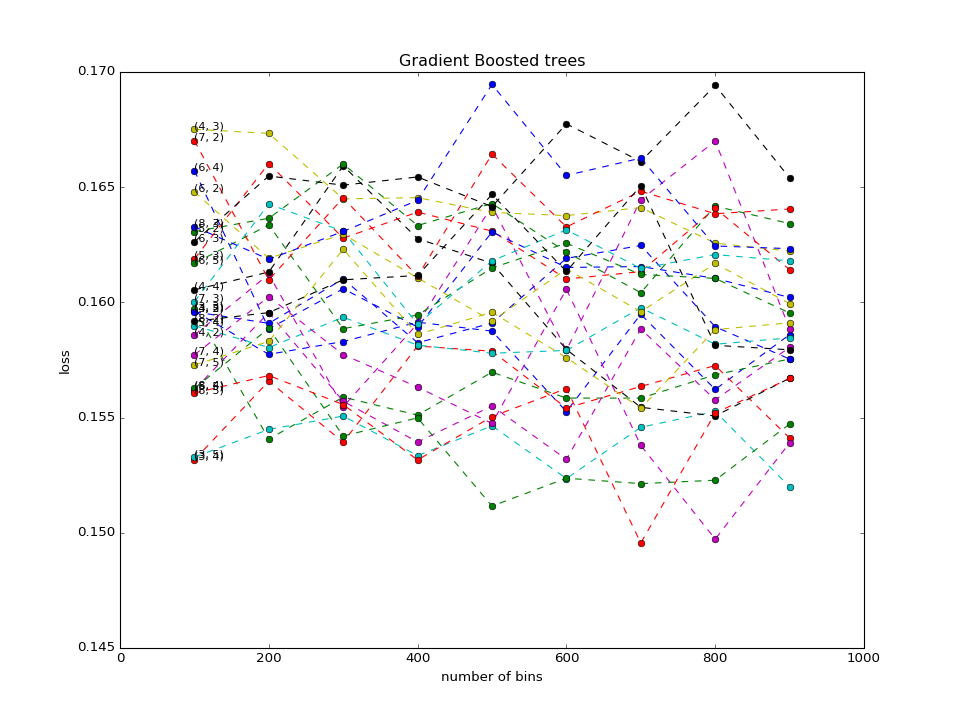

<IPython.core.display.Javascript object>


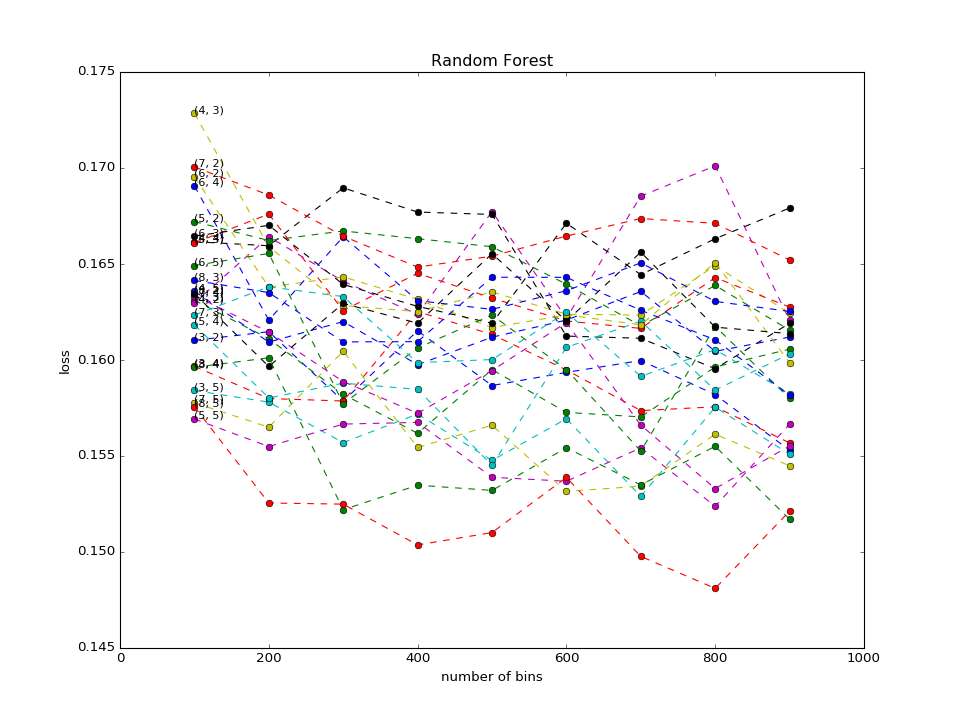

In [16]:
df = pd.DataFrame(xgb_results, columns=('x', 'y', 'bins', 'loss'))
gb = df.groupby(['x', 'y'])
plt.figure()
plt.xlabel('number of bins')
plt.ylabel('loss')
plt.xlim([0, 1000])
for g in gb:
    gdf = g[1].sort_values('bins')
    plt.plot(gdf.bins, gdf.loss, linestyle='dashed', marker='o', label=str(g[0]))
    plt.text(gdf.bins.values[0], gdf.loss.values[0], str(g[0]), fontsize='small')
plt.title('Gradient Boosted trees')
#plt.legend(loc='upper right', bbox_to_anchor=(1.05, 1), fontsize='small')

df = pd.DataFrame(etr_results, columns=('x', 'y', 'bins', 'loss'))
gb = df.groupby(['x', 'y'])
plt.figure()
plt.xlabel('number of bins')
plt.ylabel('loss')
plt.xlim([0, 1000])
for g in gb:
    gdf = g[1].sort_values('bins')
    plt.plot(gdf.bins, gdf.loss, linestyle='dashed', marker='o', label=str(g[0]))
    plt.text(gdf.bins.values[0], gdf.loss.values[0], str(g[0]), fontsize='small')
#plt.legend(loc='upper right', bbox_to_anchor=(1.05, 1), fontsize='small')
plt.title('Random Forest')

<IPython.core.display.Javascript object>


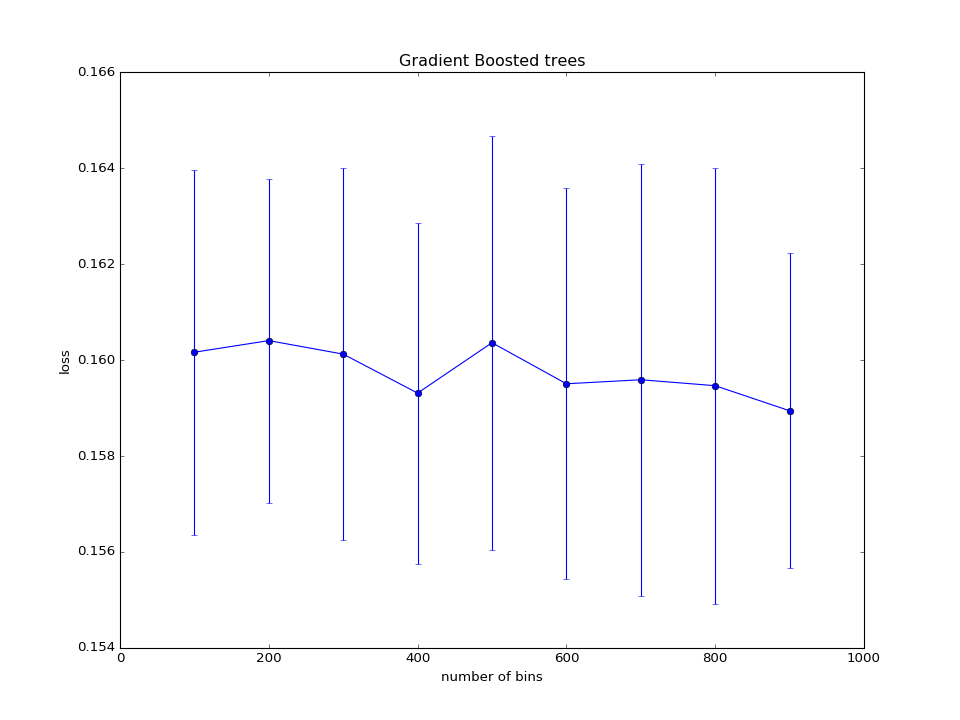

In [17]:
df = pd.DataFrame(xgb_results, columns=('x', 'y', 'bins', 'loss'))
gb = df.groupby(['bins'])
plt.figure()
plt.xlabel('number of bins')
plt.ylabel('loss')
plt.xlim([0, 1000])
data = []
for g in gb:
    mu = np.mean(g[1]['loss'])
    std = np.std(g[1]['loss'])
    data.append((g[0], mu, std))
plt.errorbar([val[0] for val in data], [val[1] for val in data], yerr=[val[2] for val in data], fmt='-o')
plt.title('Gradient Boosted trees')

<IPython.core.display.Javascript object>


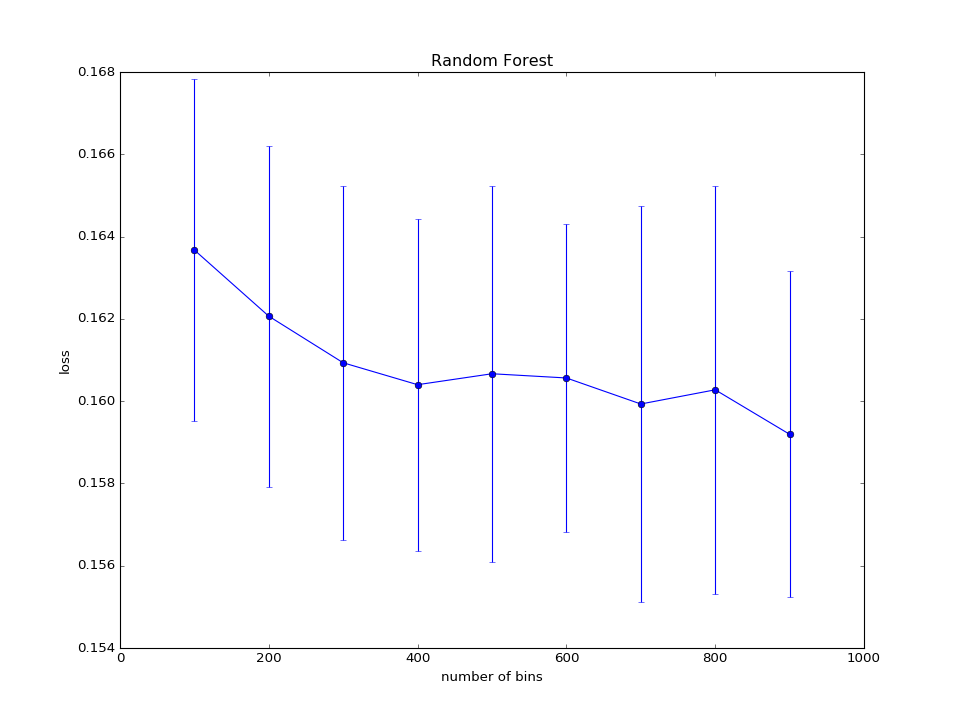

In [18]:
df = pd.DataFrame(etr_results, columns=('x', 'y', 'bins', 'loss'))
gb = df.groupby(['bins'])
plt.figure()
plt.xlabel('number of bins')
plt.ylabel('loss')
plt.xlim([0, 1000])
data = []
for g in gb:
    mu = np.mean(g[1]['loss'])
    std = np.std(g[1]['loss'])
    data.append((g[0], mu, std))
plt.errorbar([val[0] for val in data], [val[1] for val in data], yerr=[val[2] for val in data], fmt='-o')
plt.title('Random Forest')